# KAGGLE - RAIN IN AUSTRALIA

Import all libraries necessary for my project:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_curve, roc_auc_score, auc,
    confusion_matrix, ConfusionMatrixDisplay,
    precision_recall_curve, f1_score, average_precision_score,
    classification_report
)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedShuffleSplit
# models simples
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# models ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Other imports
import time
import random
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import math
from sklearn import metrics
from sklearn.decomposition import PCA

Loading the dataset:

In [2]:
raindf = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')
raindf

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Lets see what type of Data we have for each column:

In [3]:
t=raindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Now lets breakdown the dataset and see diferent properties of each column:

In [4]:
d = raindf.describe()
d

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Lets see if we have any NaNs in our dataset:

In [5]:
nan_count = raindf.isnull().sum()
nan_percentage = raindf.isnull().mean() * 100
print("Número de NaNs por columna:")
print(nan_count)
print("\nPorcentaje de NaNs por columna:")
print(nan_percentage)

Número de NaNs por columna:
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Porcentaje de NaNs por columna:
Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3

### Exploratory analysis and plots

Lets see how much rainfall has every month with random years:

(array([0, 1]), [Text(0, 0, '11'), Text(1, 0, '12')])

<Figure size 1000x800 with 0 Axes>

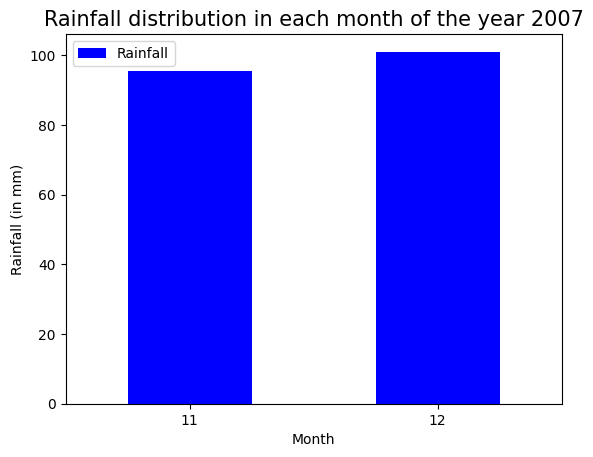

In [6]:
# Convert 'Date' column to datetime format
raindf['Date'] = pd.to_datetime(raindf['Date'], errors='coerce')
# Create a new DataFrame with 'Year', 'Month', and 'Rainfall' columns
rainfall =[raindf['Date'].dt.year, raindf['Date'].dt.month, raindf['Rainfall']]
headers = ['Year', 'Month', 'Rainfall']
rainfall_df = pd.concat(rainfall, axis=1, keys=headers)
# Select a random year between 2008 and 2017
year = random.randint(2007, 2017)
# Filter the DataFrame for the selected year
rainfall_df_year = rainfall_df[rainfall_df['Year'] == year]
# Create a bar plot of the total rainfall for each month of the selected year
plt.figure(figsize=(10,8))
a = rainfall_df_year.groupby('Month').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='blue')
# Set the title, labels, and x-ticks
plt.title(f'Rainfall distribution in each month of the year {year}', fontsize=15)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Rainfall (in mm)', fontsize=10)
plt.xticks(rotation=0)

Now, lets see the minimum and maximum temperature in each city of Australia:

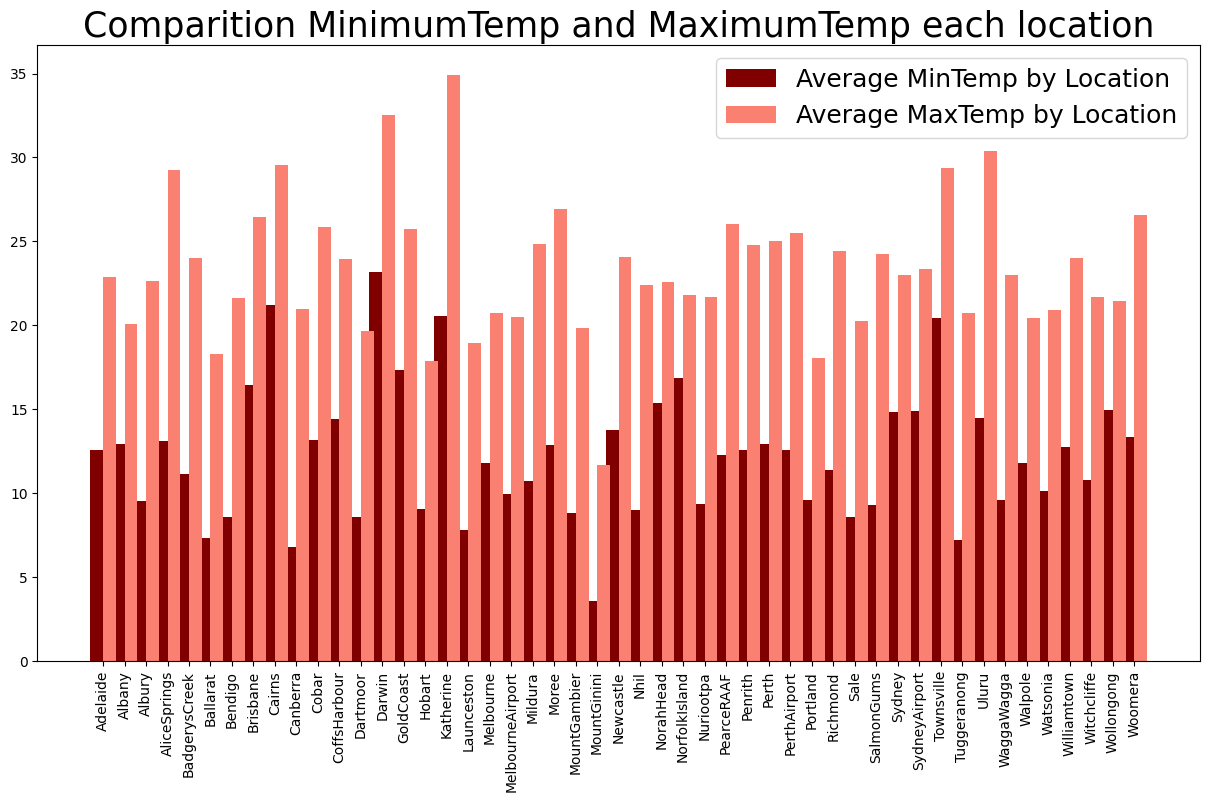

In [7]:
# Group by 'Location' and calculate mean of 'MinTemp' and 'MaxTemp' in one go
grouped = raindf.groupby('Location').agg({'MinTemp':'mean', 'MaxTemp':'mean'})
# Get unique locations and number of unique locations
loc = grouped.index
n = len(loc)
# Create x values for bar plot
x = np.arange(n)
# Set figure size
plt.rcParams["figure.figsize"] = (15,8)
# Create figure and axes
fig, ax = plt.subplots()
# Width of the bars
w = 0.6
# Create bar plots
ax.bar(x-w/2, grouped['MinTemp'], label='Average MinTemp by Location', color='maroon', width=w)
ax.bar(x+w/2, grouped['MaxTemp'], label='Average MaxTemp by Location', color='salmon', width=w)
# Set x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(loc, rotation=90)
# Set title and legend
plt.title("Comparition MinimumTemp and MaximumTemp each location", fontsize=25)
plt.legend(fontsize=18)

Finally lets see the distribution of our target:

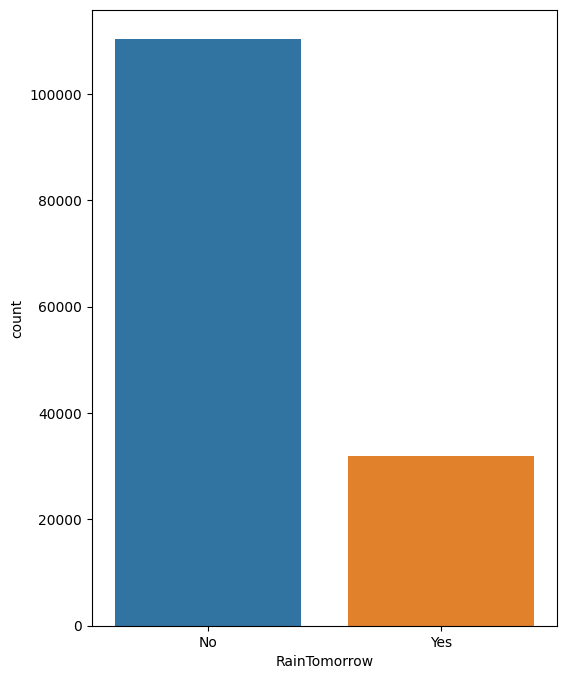

In [8]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=raindf)
plt.show()

Text(0.5, 1.0, 'Rain Today vs Rain Tomorrow')

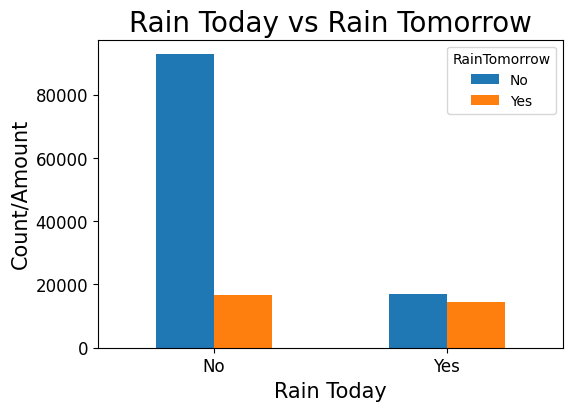

In [9]:
comp = pd.crosstab(raindf['RainToday'], raindf['RainTomorrow'])

plt.rcParams["figure.figsize"] = (6,4)
comp.plot(kind='bar',stacked=False)
plt.xlabel('Rain Today', fontsize=15)
plt.ylabel('Count/Amount', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rain Today vs Rain Tomorrow', fontsize=20)

### 2. Preprocessing

First thing we should do is split the dataset using stratified, but since we have NaNs in our target and also we are treating a dataset that move through time, we have to adjust some things in our dataset: 

First we do is convert the columns RainToday and RainTomorrow to integers and then delete the NaNs of our target:

In [10]:
# Define a mapping dictionary
mapping_dict = {'Yes': 1, 'No': 0}

# Apply the mapping to the 'RainToday' and 'RainTomorrow' columns
raindf['RainToday'] = raindf['RainToday'].map(mapping_dict)
raindf['RainTomorrow'] = raindf['RainTomorrow'].map(mapping_dict)

# Convert the 'RainToday' and 'RainTomorrow' columns to numeric, keeping NaN values
raindf['RainToday'] = pd.to_numeric(raindf['RainToday'], errors='coerce')
raindf['RainTomorrow'] = pd.to_numeric(raindf['RainTomorrow'], errors='coerce')

# Delete every row that has a NaN in the column 'RainTomorrow'
raindf.dropna(subset=['RainTomorrow'], inplace=True)  # drop rows where target is NaN

Before filling any data we have to convert the column Date to Date type and then sort every row in function of the date: 

In [11]:
raindf['Date'] = pd.to_datetime(raindf['Date'], format='%Y-%m-%d')
raindf = raindf.sort_values('Date')

The fill_na(df) function fills missing values using backfill, median, and mode filling methods, separately for each location and based on the data type of the columns. This type of filling can still let some NaNs due to the fact that some location could have a lot of NaNs on those locations so what we do is just delete those rows. 

In [12]:
def fill_na(df):
    df_filled = []
    for location in df.Location.unique():
        location_df = df[df.Location == location].copy()
        for column in location_df.columns:
            if location_df[column].dtype != 'O':
                # If column is numeric, fill NaNs with backfill, forward fill, interpolation, and median
                location_df[column].fillna(method='bfill', inplace=True)
                location_df[column].fillna(method='ffill', inplace=True)
                location_df[column].fillna(location_df[column].median(), inplace=True)
            else:
                # If column is non-numeric, fill NaNs with the most frequent value
                if not location_df[column].mode().empty:
                    location_df[column].fillna(location_df[column].mode()[0], inplace=True)
        df_filled.append(location_df)

    return pd.concat(df_filled)

# Usage:
raindf = fill_na(raindf)


Encoding Categorical Variables & Feature Engineering:

In [13]:
def convert_wind_direction(wind_dir_series):
    wind_direction_degrees = {
        'W': 270.1, 'WNW':292.5, 'WSW':247.5, 'NE':45, 'NNW':337.5, 'N': 0.1, 
        'NNE':22.5, 'SW':225.0, 'ENE':67.5, 'SSE':157.5, 'S': 180.1, 'NW':315.0, 
        'SE':135.0, 'ESE':112.5, 'E': 90.1, 'SSW':202.5
    }

    wind_direction_radians = {direction: np.sin(np.radians(degrees)) for direction, degrees in wind_direction_degrees.items()}
    converted_wind_dir_series = wind_dir_series.replace(wind_direction_radians)
    converted_wind_dir_series = pd.to_numeric(converted_wind_dir_series, errors='coerce')
    
    return converted_wind_dir_series

def preprocess_dataset(dataset):  
    
    # Create a new column 'DateSin' that represents the date as an angle
    days_in_year = 365.24
    dataset['DateSin'] = np.sin(2 * np.pi * dataset['Date'].dt.dayofyear / days_in_year)

    # Convert wind direction to a measurable quantity
    dataset['WindDir9am'] = convert_wind_direction(dataset['WindDir9am'])
    dataset['WindDir3pm'] = convert_wind_direction(dataset['WindDir3pm'])
    dataset['WindGustDir'] = convert_wind_direction(dataset['WindGustDir'])

    # Create a new column 'RainedYesterday' that is 1 if it rained yesterday and 0 otherwise
    dataset['RainedYesterday'] = dataset['RainToday'].shift()

    # Create a new column 'RainedLastWeek' that is 1 if it rained any day in the last week and 0 otherwise
    dataset['RainedLastWeek'] = dataset['RainToday'].rolling(window=7).apply(lambda x: 1 if 1 in x.values else 0)

    # Drop unnecessary columns
    dataset.drop(['Evaporation', 'Sunshine', 'Date', 'Location'],axis=1,inplace=True)
    dataset.dropna(inplace=True)
    return dataset

# Usage:
raindf = preprocess_dataset(raindf)
raindf


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,DateSin,RainedYesterday,RainedLastWeek
45593,6.1,18.2,0.2,0.707107,43.0,0.707107,0.923880,19.0,26.0,63.0,47.0,1024.6,1022.2,4.0,6.0,12.4,17.3,0.0,0.0,-0.803460,0.0,1.0
45594,8.3,17.0,0.0,0.999998,41.0,0.707107,0.999998,11.0,24.0,65.0,57.0,1026.2,1024.2,6.0,7.0,12.1,15.5,0.0,0.0,-0.793100,0.0,1.0
45595,8.8,19.5,0.0,-0.001745,48.0,0.999998,0.923880,19.0,17.0,70.0,48.0,1026.1,1022.7,7.0,7.0,14.1,18.9,0.0,1.0,-0.782505,0.0,1.0
45596,8.4,22.8,16.2,0.999998,31.0,-0.001745,0.923880,7.0,6.0,82.0,32.0,1024.1,1020.7,7.0,1.0,13.3,21.7,1.0,0.0,-0.771679,0.0,1.0
45597,9.1,25.2,0.0,0.001745,30.0,0.707107,-0.707107,6.0,9.0,74.0,34.0,1024.4,1021.1,1.0,2.0,14.6,24.0,0.0,0.0,-0.760624,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,0.999998,31.0,0.923880,0.999998,15.0,13.0,59.0,27.0,1024.7,1021.2,3.0,2.0,9.4,20.9,0.0,0.0,0.198569,0.0,0.0
145455,2.8,23.4,0.0,0.999998,31.0,0.707107,0.923880,13.0,11.0,51.0,24.0,1024.6,1020.3,3.0,2.0,10.1,22.4,0.0,0.0,0.181680,0.0,0.0
145456,3.6,25.3,0.0,-0.382683,22.0,0.707107,0.001745,13.0,9.0,56.0,21.0,1023.5,1019.1,3.0,2.0,10.9,24.5,0.0,0.0,0.164737,0.0,0.0
145457,5.4,26.9,0.0,0.001745,37.0,0.707107,-0.923880,9.0,9.0,53.0,24.0,1021.0,1016.8,3.0,2.0,12.5,26.1,0.0,0.0,0.147746,0.0,0.0


Now we can use stratify:

In [14]:
X = raindf.drop('RainTomorrow', axis=1)
y = raindf['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Correlation Analysis:

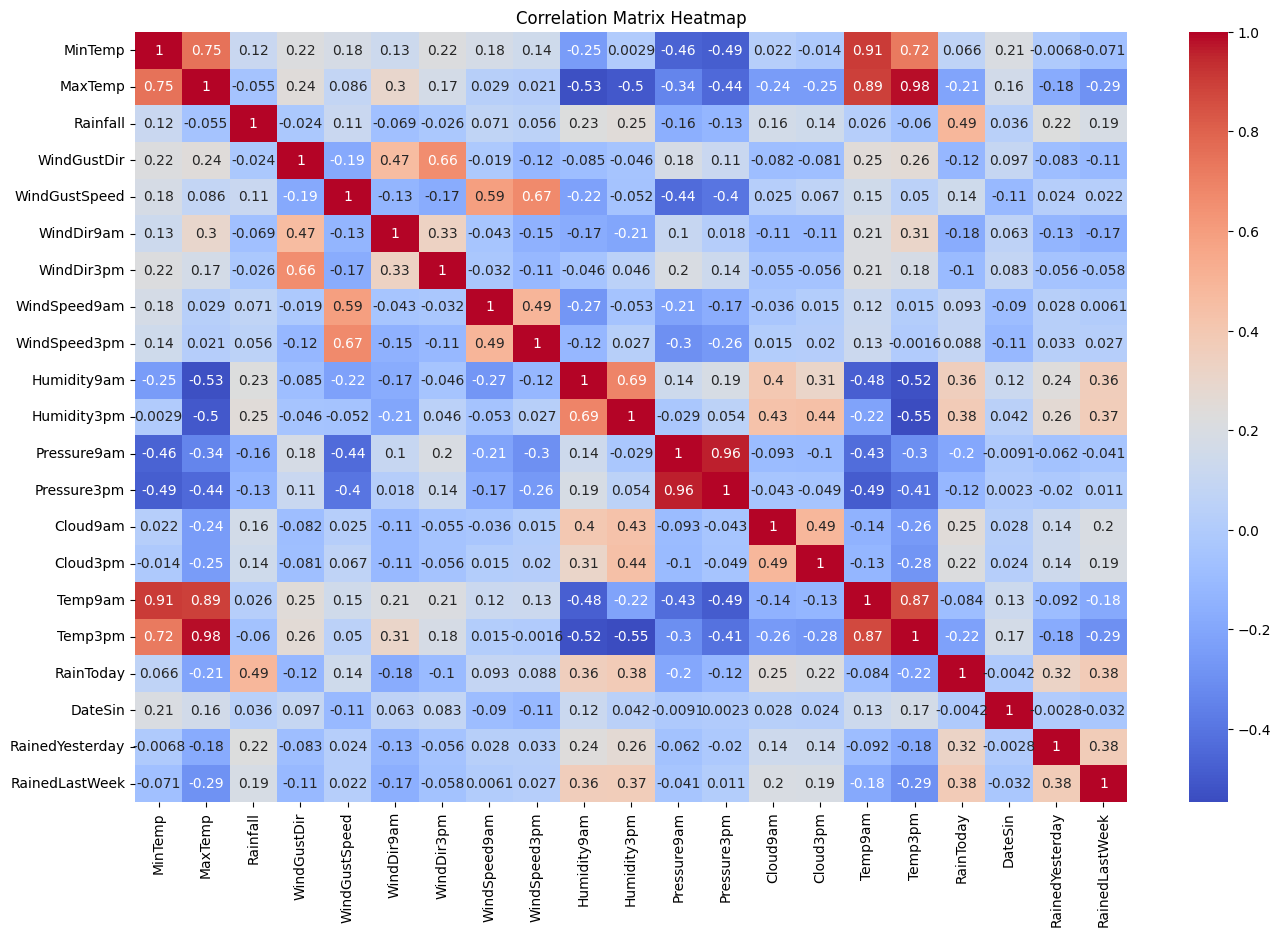

In [15]:
def plot_corr_matrix(df):
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(16, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.show()

plot_corr_matrix(X_train)

In [16]:
def remove_highly_correlated_features(df, threshold):
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index of feature columns with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Drop features 
    reduced_df = df.drop(to_drop, axis=1)

    return reduced_df

# Apply the function to your train and test sets
X_train_reduced = remove_highly_correlated_features(X_train, 0.8)
X_test_reduced = X_test[X_train_reduced.columns]
X_train_reduced

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,DateSin,RainedYesterday,RainedLastWeek
78688,15.4,26.3,0.0,0.707107,30.0,-0.999998,0.923880,2.0,17.0,87.0,68.0,1016.0,7.0,7.0,0.0,-0.497067,0.0,1.0
62104,9.6,14.2,23.2,0.707107,54.0,0.382683,0.382683,28.0,20.0,75.0,75.0,1016.3,7.0,6.0,1.0,-0.640119,1.0,1.0
33143,9.9,21.2,0.0,-0.999998,26.0,-0.999998,-0.923880,15.0,6.0,80.0,42.0,1035.8,1.0,4.0,0.0,0.282033,0.0,0.0
115077,17.8,23.6,0.0,-0.923880,48.0,-0.001745,-0.707107,31.0,26.0,62.0,40.0,1012.5,8.0,3.0,0.0,0.999577,0.0,0.0
141423,25.7,31.6,6.0,0.382683,48.0,-0.707107,-0.707107,15.0,15.0,85.0,84.0,1008.1,7.0,8.0,1.0,0.447956,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31730,14.0,15.3,27.4,0.382683,24.0,-0.923880,0.382683,11.0,15.0,96.0,94.0,1014.6,6.0,2.0,1.0,0.457466,0.0,1.0
62758,5.8,14.3,0.0,-0.923880,41.0,-0.707107,-0.999998,11.0,26.0,86.0,58.0,1031.1,7.0,6.0,0.0,-0.375560,0.0,1.0
31001,10.4,22.3,2.0,-0.999998,50.0,-0.999998,-0.923880,24.0,7.0,48.0,34.0,1020.0,1.0,1.0,1.0,0.827156,0.0,1.0
58198,14.3,35.0,0.0,0.382683,39.0,0.382683,-0.001745,20.0,11.0,44.0,13.0,1018.9,0.0,1.0,0.0,0.432510,0.0,0.0


Standardization:

In [17]:
def standardize_data(train, test):
    # Create a StandardScaler
    scaler = StandardScaler()

    # Select numerical columns (integer and float), excluding 'RainToday'
    num_cols = [col for col in train.select_dtypes(include=['int64', 'float64']).columns if col != 'RainToday' and col != 'RainedYesterday' and col != 'RainedLastWeek']

    # Fit the scaler on the numerical columns of the training data
    scaler.fit(train[num_cols])

    # Transform the numerical columns of the training and test data
    train[num_cols] = scaler.transform(train[num_cols])
    test[num_cols] = scaler.transform(test[num_cols])

    return train, test

# Apply the function to the training and test sets
X_train, X_test = standardize_data(X_train, X_test)
X_train_reduced, X_test_reduced = standardize_data(X_train_reduced, X_test_reduced)
X_train_reduced

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,DateSin,RainedYesterday,RainedLastWeek
78688,0.432785,0.350455,-0.266413,0.987687,-0.774193,-1.518645,1.292801,-1.459633,-0.257861,1.019409,0.890575,-0.203676,0.805537,0.895719,0.0,-0.725356,0.0,1.0
62104,-0.452012,-1.333326,2.334160,0.987687,1.005162,0.468506,0.535239,1.518710,0.089314,0.395707,1.227553,-0.161183,0.805537,0.531200,1.0,-0.927624,1.0,1.0
33143,-0.406247,-0.359238,-0.266413,-1.370747,-1.070752,-1.518645,-1.293678,0.029539,-1.530834,0.655583,-0.361057,2.600913,-1.250049,-0.197838,0.0,0.376252,0.0,0.0
115077,0.798908,-0.025265,-0.266413,-1.265585,0.560323,-0.083984,-0.990241,1.862365,0.783663,-0.279971,-0.457336,-0.699437,1.148135,-0.562357,0.0,1.390824,0.0,0.0
141423,2.004063,1.087978,0.406149,0.539483,0.560323,-1.097710,-0.990241,0.029539,-0.489310,0.915459,1.660811,-1.322679,0.805537,1.260238,1.0,0.610859,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31730,0.219213,-1.180255,2.804953,0.539483,-1.219031,-1.409249,0.535239,-0.428668,-0.489310,1.487186,2.142208,-0.401981,0.462940,-0.926875,1.0,0.624306,0.0,1.0
62758,-1.031707,-1.319410,-0.266413,-1.265585,0.041345,-1.097710,-1.400229,-0.428668,0.783663,0.967434,0.409178,1.935177,0.805537,0.531200,0.0,-0.553551,0.0,1.0
31001,-0.329971,-0.206167,-0.042225,-1.370747,0.708603,-1.518645,-1.293678,1.060503,-1.415109,-1.007624,-0.746174,0.362907,-1.250049,-1.291394,1.0,1.147028,0.0,1.0
58198,0.264979,1.561107,-0.266413,0.539483,-0.106935,0.468506,-0.002882,0.602297,-0.952210,-1.215525,-1.757108,0.207097,-1.592647,-1.291394,0.0,0.589020,0.0,0.0


PCA:

Explained variance ratio:  [0.20997494 0.18066649 0.1324415  0.09032849 0.06135156 0.05784568
 0.04839272 0.04013363 0.03372159 0.03113616]


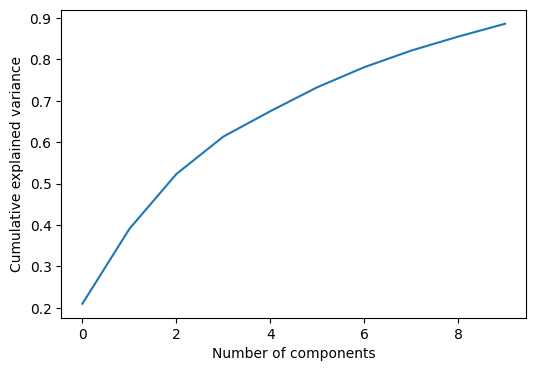

(81745, 10)

In [18]:
def apply_pca(X_train, X_test, n_components):
    # Initialize PCA
    pca = PCA(n_components=n_components)

    # Fit and transform the training data
    X_train_pca = pca.fit_transform(X_train)

    # Transform the test data
    X_test_pca = pca.transform(X_test)

    # Print the explained variance ratio
    print("Explained variance ratio: ", pca.explained_variance_ratio_)
    
    explained_variance = np.cumsum(pca.explained_variance_ratio_)

    plt.plot(explained_variance)
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative explained variance')
    plt.show()

    return X_train_pca, X_test_pca

# Apply the function to your train and test sets
X_train_reduced_pca, X_test_reduced_pca = apply_pca(X_train_reduced, X_test_reduced, 10)
X_train_reduced_pca.shape

### Model selection:

Before we start training models, lets create functions that we are going to use through this part of the project:

In [19]:
def show_performance(x, y, model, title='confusion matrix', average='macro', figsize=(5, 5)):
    predictions = model.predict(x)
    acc = accuracy_score(y, predictions)
    prec = precision_score(y, predictions, average=average)
    rec = recall_score(y, predictions, average=average)
    f1 = f1_score(y, predictions, average=average)

    conf_mat = confusion_matrix(y, predictions)
    conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

    print(f'Accuracy:{acc}')
    print(f'Precision:{prec}')
    print(f'Recall:{rec}')
    print(f'F1-score:{f1}')
    
    disp=ConfusionMatrixDisplay(conf_mat)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

In [20]:
def generate_roc(X_test, y_test, model):
    # generate a no skill prediction (majority class)
    ns_probs = [1 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)

    # summarize scores
    print('Classificador sense capacitat predictiva: ROC AUC=%.3f' % (ns_auc))
    print('El nostre model: ROC AUC=%.3f' % (lr_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lr_probs)

    # Distance criteria
    # D = (1-sensitivity)^2 + (1-specificity)^2
    # Thr = arg min(D)
    best_cutoff_dist = np.argmin((1 - lr_tpr) ** 2 + lr_fpr ** 2)
    print(f'Best Distance threshold: {round(lr_threshold[best_cutoff_dist], 3)}')

    # Youden index
    # J = sensitivity + specificity − 1
    # Thr = arg max(J)
    best_cutoff_youden = np.argmax(lr_tpr + (1 - lr_fpr) - 1)
    print(f'Best Youden threshold: {round(lr_threshold[best_cutoff_youden], 3)}')


    plt.axvline(x=lr_fpr[best_cutoff_dist], color='black', linestyle='--',
                label=f'dist threshold = {lr_threshold[best_cutoff_dist]:.3}')
    plt.axvline(x=lr_fpr[best_cutoff_youden], color='red', linestyle='--',
                label=f'Youden threshold = {lr_threshold[best_cutoff_youden]:.3}')

    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sense capacitat predictiva')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Nostre')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [21]:
def generate_PR(X_test, y_test, model):
     # generate a no skill prediction (majority class)
    ns_probs = [1 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = model.predict_proba(X_test)
    
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
    lr_auc = auc(lr_recall, lr_precision)
    # summarize score
    print('El nostre model té una auc=%.3f' % (lr_auc))
    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sense capacitat predictiva')
    plt.plot(lr_recall, lr_precision, marker='.', label='Nostre')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [22]:
stratified_kfold5 = StratifiedKFold(n_splits=5)
stratified_kfold10 = StratifiedKFold(n_splits=10)

def grid_search_param(model, param_grid, X_train, y_train, cv):
    grid = GridSearchCV(model, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train, y_train)
    grid.cv_results_.keys()
    
    # Dictionary containing the parameters used to generate that score
    print(f'Best parameters: {grid.best_params_}')
    # Single best score achieved across all params (k)
    print(f'Best F1 found: {round(grid.best_score_, 5)}')
    return grid.best_estimator_

def cv_scores(model, X_train, y_train, cv):
    start_time = time.time()
    score = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_macro')
    end_time = time.time()
    
    print("f1 score: ", score.mean())
    print("Time for CV: ", end_time - start_time)

##### Logistic Regression:

In [23]:
# Define the parameter grid for Logistic Regression
param_grid = {'penalty': ['l1', 'l2', 'none'], 'C': np.logspace(-4, 4, 20),'solver': ['newton-cg', 'lbfgs', 'liblinear']}

print(f'Grid: {param_grid}')

# Initialize Logistic Regression
log_reg = LogisticRegression()

# Perform grid search
best_log_reg_5 = grid_search_param(log_reg, param_grid, X_train, y_train, stratified_kfold5)
best_log_reg_10 = grid_search_param(log_reg, param_grid, X_train, y_train, stratified_kfold10)
best_log_reg_reduced = grid_search_param(log_reg, param_grid, X_train_reduced_pca, y_train, stratified_kfold10)

Grid: {'penalty': ['l1', 'l2', 'none'], 'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'solver': ['newton-cg', 'lbfgs', 'liblinear']}


/opt/conda/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/

Best parameters: {'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 found: 0.74996


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best parameters: {'C': 0.03359818286283781, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 found: 0.74991


/opt/conda/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/

Best parameters: {'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1 found: 0.73166


Results:

In [24]:
print("Default scores w/ 5 folds:")
cv_scores(log_reg, X_train, y_train, stratified_kfold5)

print("Best estimator scores w/ 5 folds:")
cv_scores(best_log_reg_5, X_train, y_train, stratified_kfold5)

Default scores w/ 5 folds:
f1 score:  0.7497067980962335
Time for CV:  3.943275213241577
Best estimator scores w/ 5 folds:
f1 score:  0.7499567974458781
Time for CV:  3.890223741531372


In [25]:
print("Default scores w/ 10 folds:")
cv_scores(log_reg, X_train, y_train, stratified_kfold10)

print("Best estimator scores w/ 10 folds:")
cv_scores(best_log_reg_10, X_train, y_train, stratified_kfold10)

Default scores w/ 10 folds:
f1 score:  0.7496672215624477
Time for CV:  7.644888401031494
Best estimator scores w/ 10 folds:
f1 score:  0.749914586215598
Time for CV:  7.5519444942474365


In [26]:
print("Default scores w/ 10 folds and reduced dataset:")
cv_scores(log_reg, X_train_reduced_pca, y_train, stratified_kfold10)

print("Best estimator scores w/ 10 folds and reduced dataset:")
cv_scores(best_log_reg_reduced, X_train_reduced_pca, y_train, stratified_kfold10)

Default scores w/ 10 folds and reduced dataset:
f1 score:  0.7244958630332766
Time for CV:  1.5981993675231934
Best estimator scores w/ 10 folds and reduced dataset:
f1 score:  0.7316587795059805
Time for CV:  2.9719409942626953


##### KNN:

In [27]:
param_grid = {
    'n_neighbors': list(range(5, 20)),
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}
print(f'Grid: {param_grid}')

knn = KNeighborsClassifier()
best_knn_5 = grid_search_param(knn, param_grid, X_train, y_train, stratified_kfold5)
best_knn_10 = grid_search_param(knn, param_grid, X_train, y_train, stratified_kfold10)
best_knn_reduced = grid_search_param(knn, param_grid, X_train_reduced_pca, y_train, stratified_kfold10)

Grid: {'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'p': [1, 2], 'weights': ['uniform', 'distance']}
Best parameters: {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
Best F1 found: 0.74196
Best parameters: {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
Best F1 found: 0.74486
Best parameters: {'n_neighbors': 19, 'p': 2, 'weights': 'distance'}
Best F1 found: 0.72033


Results:

In [28]:
print("Default scores w/ 5 folds:")
cv_scores(knn, X_train, y_train, stratified_kfold5)

print("Best estimator scores w/ 5 folds:")
cv_scores(best_knn_5, X_train, y_train, stratified_kfold5)

Default scores w/ 5 folds:
f1 score:  0.7326629569453489
Time for CV:  19.251301050186157
Best estimator scores w/ 5 folds:
f1 score:  0.7419639337295812
Time for CV:  80.11073803901672


In [29]:
print("Default scores w/ 10 folds:")
cv_scores(knn, X_train, y_train, stratified_kfold10)

print("Best estimator scores w/ 10 folds:")
cv_scores(best_knn_10, X_train, y_train, stratified_kfold10)

Default scores w/ 10 folds:
f1 score:  0.7343858686616198
Time for CV:  21.097867488861084
Best estimator scores w/ 10 folds:
f1 score:  0.7448647610431189
Time for CV:  90.15365529060364


In [30]:
print("Default scores w/ 10 folds and reduced dataset:")
cv_scores(knn, X_train_reduced_pca, y_train, stratified_kfold10)

print("Best estimator scores w/ 10 folds and reduced dataset:")
cv_scores(best_knn_reduced, X_train_reduced_pca, y_train, stratified_kfold10)

Default scores w/ 10 folds and reduced dataset:
f1 score:  0.7114063121927433
Time for CV:  39.08410692214966
Best estimator scores w/ 10 folds and reduced dataset:
f1 score:  0.7203252282342487
Time for CV:  55.24750518798828


##### XGBoost:

In [31]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 500],
    'min_child_weight': [1, 3, 5]
}

print(f'Grid: {param_grid}')

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
best_xgb_5 = grid_search_param(xgb, param_grid, X_train, y_train, stratified_kfold5)
best_xgb_10 = grid_search_param(xgb, param_grid, X_train, y_train, stratified_kfold10)
best_xgb_reduced = grid_search_param(xgb, param_grid, X_train_reduced_pca, y_train, stratified_kfold10)

Grid: {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10], 'n_estimators': [100, 200, 500], 'min_child_weight': [1, 3, 5]}
Best parameters: {'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 500}
Best F1 found: 0.77275
Best parameters: {'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 500}
Best F1 found: 0.7756
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 500}
Best F1 found: 0.73604


Results:

In [32]:
print("Default scores w/ 5 folds:")
cv_scores(xgb, X_train, y_train, stratified_kfold5)

print("Best estimator scores w/ 5 folds:")
cv_scores(best_xgb_5, X_train, y_train, stratified_kfold5)

Default scores w/ 5 folds:
f1 score:  0.766430847052227
Time for CV:  5.626001834869385
Best estimator scores w/ 5 folds:
f1 score:  0.7727525561812628
Time for CV:  37.00383377075195


In [33]:
print("Default scores w/ 10 folds:")
cv_scores(xgb, X_train, y_train, stratified_kfold10)

print("Best estimator scores w/ 10 folds:")
cv_scores(best_xgb_10, X_train, y_train, stratified_kfold10)

Default scores w/ 10 folds:
f1 score:  0.7681136395240158
Time for CV:  9.530404329299927
Best estimator scores w/ 10 folds:
f1 score:  0.7756008874853532
Time for CV:  79.90017890930176


In [34]:
print("Default scores w/ 10 folds and reduced dataset:")
cv_scores(xgb, X_train_reduced_pca, y_train, stratified_kfold10)

print("Best estimator scores w/ 10 folds and reduced dataset:")
cv_scores(best_xgb_reduced, X_train_reduced_pca, y_train, stratified_kfold10)

Default scores w/ 10 folds and reduced dataset:
f1 score:  0.7327924263656822
Time for CV:  7.572357416152954
Best estimator scores w/ 10 folds and reduced dataset:
f1 score:  0.7360438478778211
Time for CV:  17.69754934310913


### Final Analysis:

Accuracy:0.8535010030826442
Precision:0.8015509950659305
Recall:0.728056860163834
F1-score:0.7543746950175318


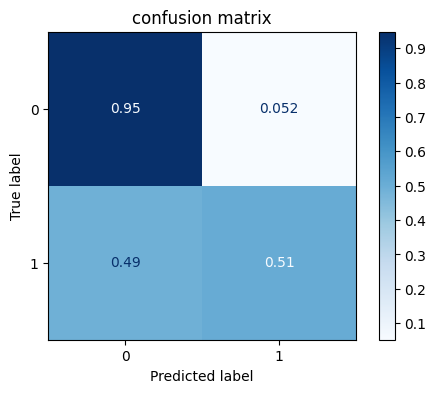

Classificador sense capacitat predictiva: ROC AUC=0.500
El nostre model: ROC AUC=0.874
Best Distance threshold: 0.203
Best Youden threshold: 0.203


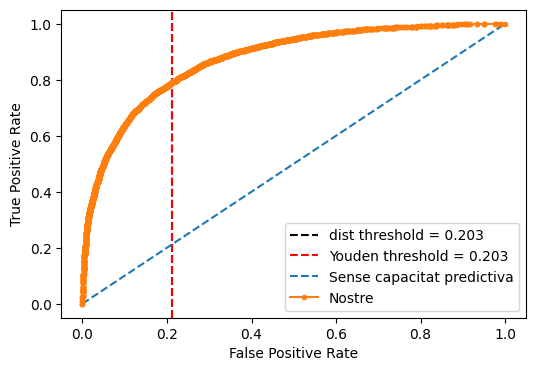

In [35]:
# Logistic Regression:
show_performance(X_test, y_test, best_log_reg_10)
generate_roc(X_test, y_test, best_log_reg_10)

Accuracy:0.8497333268092185
Precision:0.7985719355135261
Recall:0.7155572669910796
F1-score:0.7435651905957377


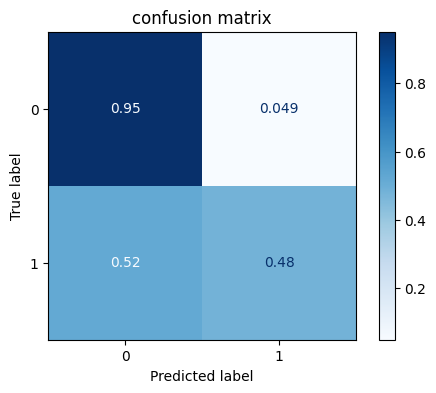

Classificador sense capacitat predictiva: ROC AUC=0.500
El nostre model: ROC AUC=0.854
Best Distance threshold: 0.229
Best Youden threshold: 0.244


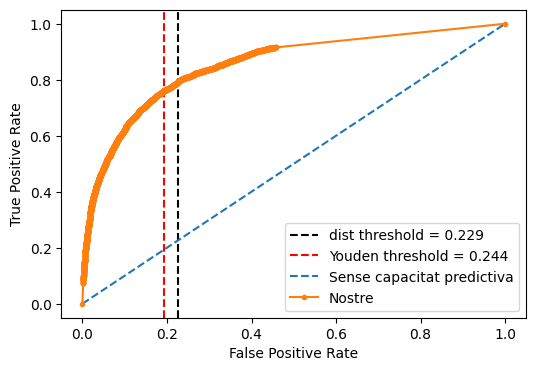

In [36]:
# KNN:
show_performance(X_test, y_test, best_knn_10)
generate_roc(X_test, y_test, best_knn_10)

Accuracy:0.8637764838283506
Precision:0.8144731965984963
Recall:0.7538899855632417
F1-score:0.7774820289404807


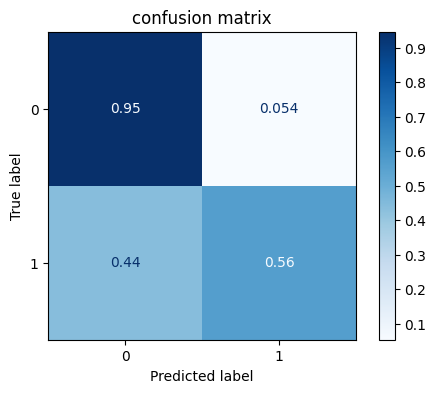

Classificador sense capacitat predictiva: ROC AUC=0.500
El nostre model: ROC AUC=0.894
Best Distance threshold: 0.07699999958276749
Best Youden threshold: 0.07699999958276749


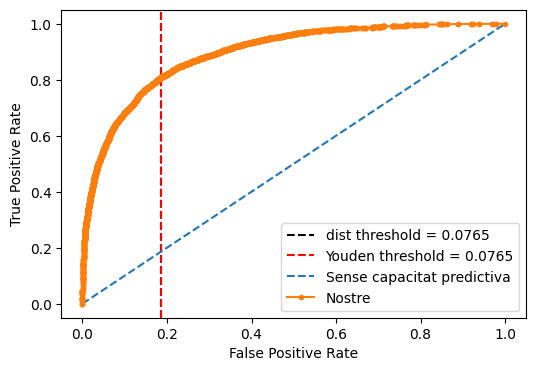

In [37]:
# XGBoost:
show_performance(X_test, y_test, best_xgb_10)
generate_roc(X_test, y_test, best_xgb_10)